### 블로그 글 작성 주제 선정

넷플릭스 : 넷플릭스는 영화의 평점과 후기를 앱에서 보여주지 않기 때문에 사람들이 직접 검색해서 후기를 찾아볼 것이다  
netflix ranking site : "https://flixpatrol.com/top10/netflix/south-korea/"

problem
1. movie 명이 영어로 되있어서 한글로 번역해야하는데 단순 번역이 안맞음
2. 같은 이름을 가진 영화들의 전처리 필요
3. 사진을 같이 업로드해야함
--- 영화 블로그는 정교한 분석을 필요로하고 같은 영화 이름을 처리하거나 사진을 찾는 것이 어려움

음식 : 현재 사람들이 많이 주문하는 음식들의 효능 및 부작용을 작성하는 블로그글 , 추후 쿠팡 파트너스 연계로 수익화

1. 식품 크롤링하여 선택

        problem
                1. 쿠팡 > 식품 >  과일 탭에서 쿠팡 추천 랭킹순 크롤링 url = "https://www.coupang.com/np/categories/194282" -> 쿠팡 웹페이지 런타임 오류 
                2. 쿠팡 웹페이지 런타임 오류 -> 마켓컬리로 변경 url = "https://www.kurly.com/collections/market-best"
                3. 마켓컬리도 크롤링은 막아놓은 듯 함.. 재접속이나 페이지 이동시 런타임 오류 현상 발생
                4. 네이버 쇼핑 -> 품목의 이름이 너무 복잡함 ex) 40년 단감 태추단감 감 부유 고당도 대봉 홍시 진영단감 선물세트..
        

        -> 11번가로 크롤링 결정
                ex) ['[최종가5,900원]해물오꼬노미야끼', '밀키트', '2인분'] ['최종', '해물', '꼬', '노미', '끼', '밀', '키트', '인분']
                키워드를 뽑는 알고리즘을 뽑아 내야함 
                방법 1. 상세 페이지 내에서 나온 단어 수를 count 하여 중요도 결정 및 그래프를 보며 알고리즘 수정

2. 이름, 이미지 크롤링
3. 이름 -> chatgpt로 script 생성
4. 블로그에 script, 이미지 적용
5. script내에서 tag 추출, tag 적용
6. 업로드



### 블로그 글 chatgpt openai로 생성

### 생성된 글을 네이버 블로그에 작성

### 추후 블로그 성장률에 따른 글 작성 방법 수정

general problem 
1. chatgpt의 openai의 토큰이 쉽게 넘어가 유료 플랜을 사용해야함 -> gui로 직접 사용

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.options import Options
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12

In [2]:
from konlpy.tag import Okt

In [3]:
import os
os.environ['JAVA_HOME'] = "C:\Program Files\Java"

In [4]:
okt = Okt()
text = "품질보장! 경북 영천 샤인머스켓 1kg"
okt.pos(text)
okt.nouns(text)

['품질', '보장', '경북', '영천', '샤인', '머스켓']

In [69]:
okt.pos('씨없는')

[('씨', 'Noun'), ('없는', 'Adjective')]

In [5]:
url = "https://www.11st.co.kr/browsing/BestSeller.tmall?method=getBestSellerMain&cornerNo=1"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')
food_list = soup.find('div', class_="best_prd_box").find_all('li')
food_list[0].a['href']

'https://www.11st.co.kr/products/3871801519?inpu=&trTypeCd=22&trCtgrNo=895019'

In [6]:
food_list[0].p.text.strip()

'씨없는 청도 고당도 반시  5kg 50과내외 부드러운 홍시'

In [79]:
urls =[]
names = []
for food in food_list[5:10]:
    urls.append(food.a['href'])
    names.append(food.p.text.strip())

print(urls), print(names)

['https://www.11st.co.kr/products/5192752091?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/2247363143?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/3855314524?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/5718874526?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/4490313480?inpu=&trTypeCd=22&trCtgrNo=895019']
['더진한 100% 닭다리살 양념닭갈비 300g x 4팩(1.2kg) 숯불닭갈비 양념불백 간장불백 메', '쟌슨빌 부대찌개 500g 2+2팩 (더진한/오리지널)', '[우체국쇼핑×어글리러블리]못난이 황금향 2.5kg, 4.5kg', '광림상회 호주산 소찜갈비, 2kg', '[최종가20,700원]하동녹차 명란김 24봉 3박스(총72봉)']


(None, None)

In [80]:
names[0]

'더진한 100% 닭다리살 양념닭갈비 300g x 4팩(1.2kg) 숯불닭갈비 양념불백 간장불백 메'

In [81]:
refined_name = []
for i in names:
    bucket =[]
    for j in i.split():
        if j[0].isalpha() and len(j) > 1:
            bucket.append(j)
            print(j)
    refined_name.append(bucket)



더진한
닭다리살
양념닭갈비
숯불닭갈비
양념불백
간장불백
쟌슨빌
부대찌개
황금향
광림상회
호주산
소찜갈비,
명란김


In [82]:
for i in refined_name[0]:
    print(' '.join(i.split()))

더진한
닭다리살
양념닭갈비
숯불닭갈비
양념불백
간장불백


In [83]:
refined_name

[['더진한', '닭다리살', '양념닭갈비', '숯불닭갈비', '양념불백', '간장불백'],
 ['쟌슨빌', '부대찌개'],
 ['황금향'],
 ['광림상회', '호주산', '소찜갈비,'],
 ['명란김']]

In [84]:
urls[0]

'https://www.11st.co.kr/products/5192752091?inpu=&trTypeCd=22&trCtgrNo=895019'

scroll Done! 1 번째
scroll Done! 2 번째
scroll Done! 3 번째
scroll Done! 4 번째
scroll Done! 5 번째


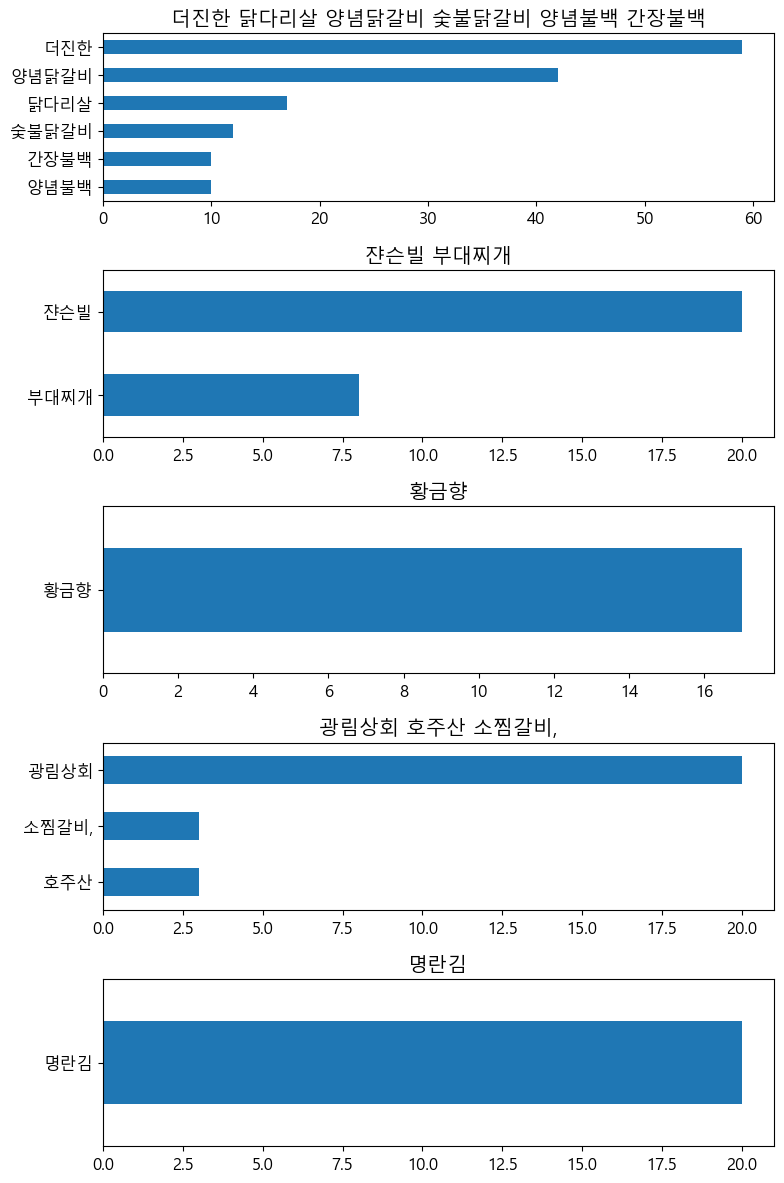

In [85]:
# 동적 스크립트 아래까지 모두 보이게 스크롤
fig, axes = plt.subplots(5, 1, figsize=(8, 12))
for idx, (url, name) in enumerate(zip(urls, refined_name)):

    browser = webdriver.Chrome()
    browser.get(url)

    pre_height = browser.execute_script('return document.body.scrollHeight')

    # 스크롤
    while True:
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)

        curr_height = browser.execute_script('return document.body.scrollHeight')

        if curr_height == pre_height:
            break
        pre_height = curr_height
        
    print(f'scroll Done! {idx + 1} 번째')

    soup = BeautifulSoup(browser.page_source, 'lxml')

    # 전체 스크립트로 빈도수 찾기
    full_text = re.sub(r'\s+', ' ',soup.text).strip()

    # 시각화로 비교
    food_count = {}
    for i in (name):
            food_count[i] = full_text.count(i)

    pd.Series(food_count).sort_values(ascending=True)[-10:].plot(kind='barh', ax=axes[idx])
    axes[idx].set_title(' '.join(name))
        
plt.tight_layout()
plt.show()



In [86]:
except_list = ['볶음']

In [87]:
############## test part

for i in okt.nouns(names[1]):
    print(full_text.count(i), i)
print('-'*50)
for i in names[1].split():
    print(full_text.count(i), i)

0 쟌슨빌
0 부대찌개
8 팩
3 리지
3 널
--------------------------------------------------
0 쟌슨빌
0 부대찌개
6 500g
0 2+2팩
0 (더진한/오리지널)


<Axes: >

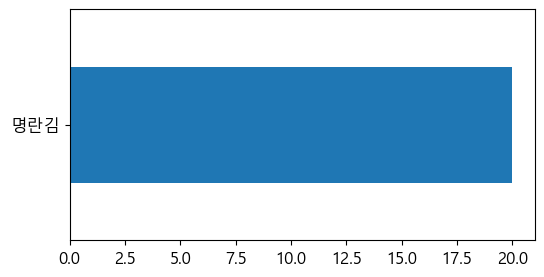

In [88]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

pd.Series(food_count).sort_values(ascending=True)[-10:].plot(kind='barh')

